In [1]:
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

# Reed Model

Here is the Bernoulli equation that is used to approximate the flow through the reed's opening

\begin{equation}
    u =  wx \left(\frac{2|p\Delta |}{\rho}\right)^{\frac{1}{2}}sgn(p\Delta)
\end{equation}

Here, x is the delta between the reed's equilibirum position H and its hooks law:

\begin{equation}
x = H - \frac{A_r p\Delta}{k}
\end{equation}

This equation is determined from viewing the reed as a spring model
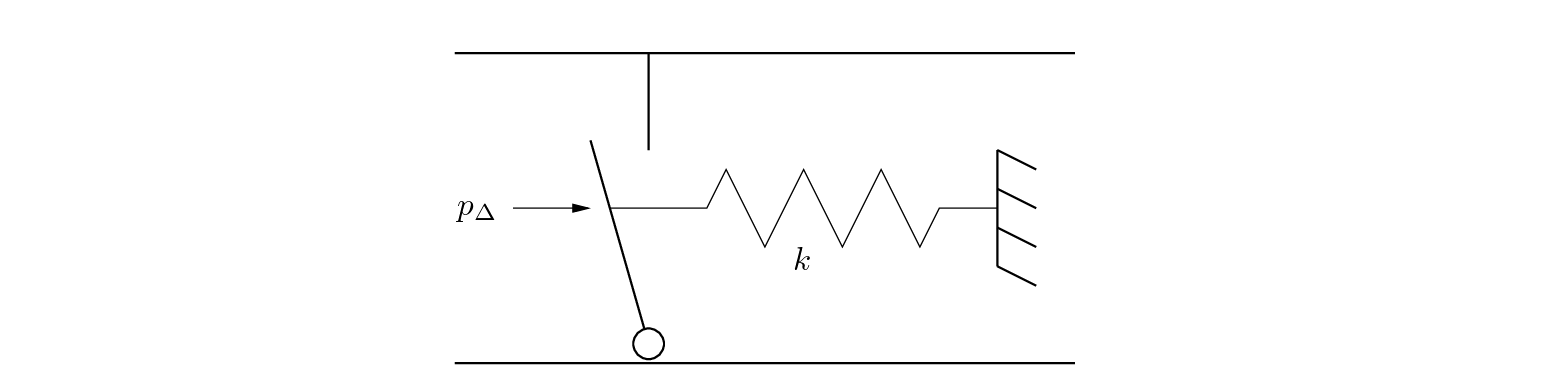

Now, if we were to plug x into the flow equation, we would get:

\begin{equation}
u = wH\left(1 - \frac{p\Delta }{p_c}\right)\left(\frac{2p\Delta }{\rho}\right)^{\frac{1}{2}} sgn(p\Delta )
\end{equation}

Here $\rho$ is the fluid density, w us the width of the reed channel and $p_c$ is the required pressure to close the reed completely.

$$ p_c = \frac{kH}{A_r} $$

If we were to lump the left sided constants together, we get:

\begin{align}
    \beta &= \sqrt{\frac{2}{\rho}}wH \\
    u &= \beta \sqrt{|p\Delta| } \left(1 - \frac{p\Delta }{p_c}\right)sgn(p\Delta)
\end{align}

As we are not applying this model to an actual clarinet model and instead modeling it for a 1 dof haptic motor, $\beta$ and $p_c$ can be set to one leaving us with the equation:

\begin{equation}
    u = \sqrt{|p\Delta |} \left(1 - p\Delta \right) sgn(p\Delta)
\end{equation}

What we expect:
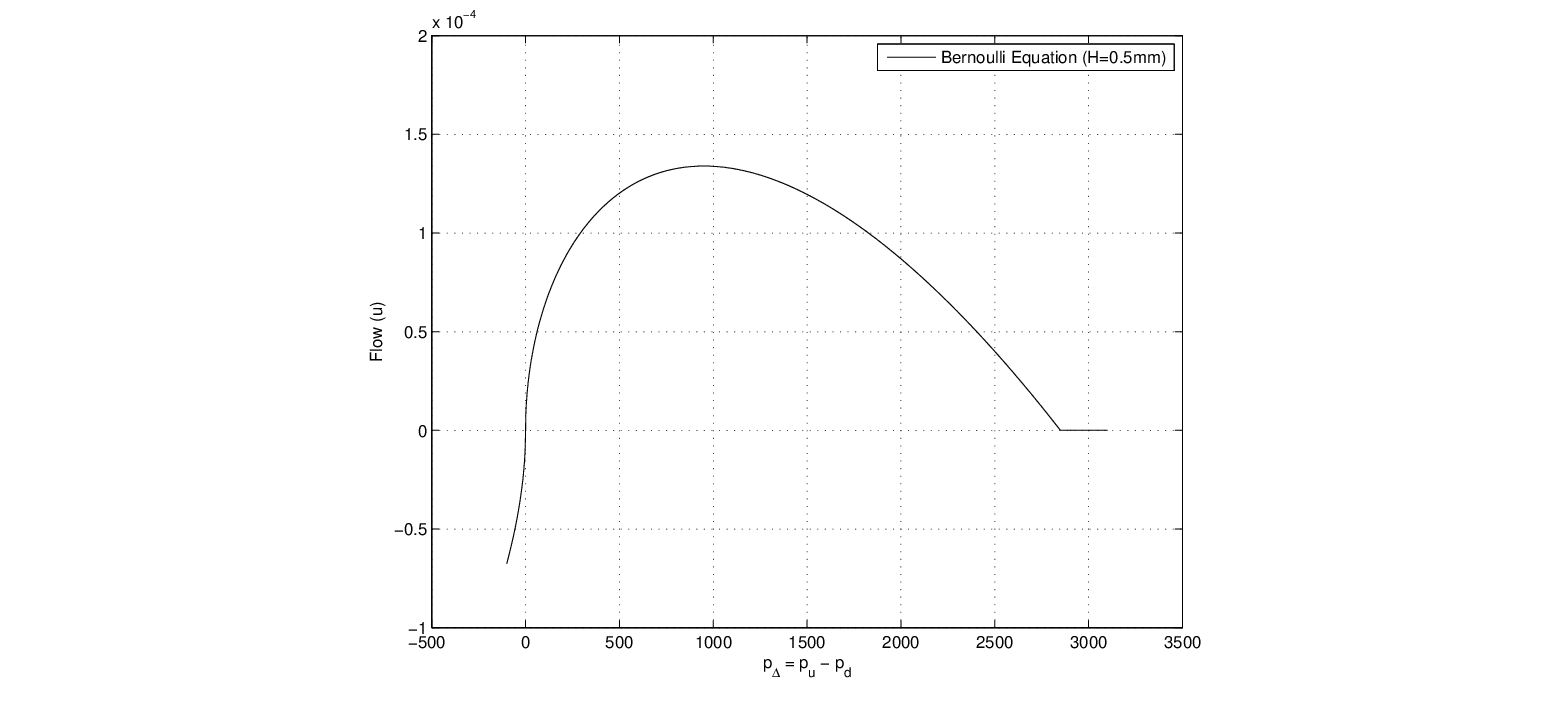

In [2]:
beta = 1
p_c = 1
p_delta = np.arange(-0.1,1.001,0.001)
p_delta_diff = 1-p_delta
p_delta_sign = np.sign(p_delta)
p_delta_sqrt = np.sqrt(np.abs(p_delta))

In [3]:
u = p_delta_sqrt*p_delta_diff*p_delta_sign

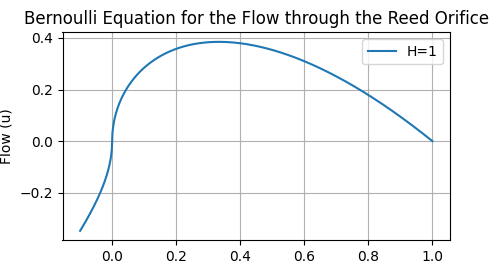

In [4]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(p_delta,u, label='H=1')
ax.grid(1)
ax.set_xlabel('normalized $p\Delta$')
ax.set_ylabel('Flow (u)')
ax.legend()
ax.set_title('Bernoulli Equation for the Flow through the Reed Orifice')
plt.show()

As we can see the resulting graph follows similarly to that of the desired graphic presented above without the need of determining the required parameters of H, etc. Further conditioning of the data is required. First, the pressure difference $p_\Delta$ will have it's range adjusted between $[0-360]^o$ and the flow to be normalized between 0 and 1.

In [5]:
p_delta = np.arange(0,360.001,0.001)
p_delta_diff = 1-(p_delta/360)
p_delta_sign = np.sign(p_delta)
p_delta_sqrt = np.sqrt(np.abs(p_delta))
u = (p_delta_sqrt*p_delta_diff*p_delta_sign)
u = u/np.max(u)

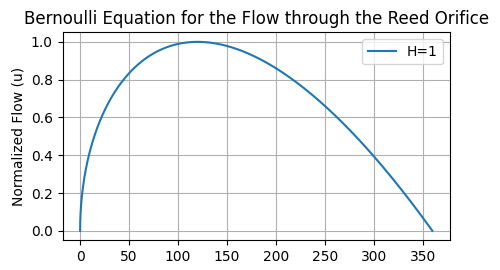

In [6]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(p_delta,u, label='H=1')
ax.grid(1)
ax.set_xlabel('Angle $Deg$')
ax.set_ylabel('Normalized Flow (u)')
ax.legend()
ax.set_title('Bernoulli Equation for the Flow through the Reed Orifice')
plt.show()

Now, a naive aproach would be to directly implement this effect as is, and should be done as an excersice. Let's look at the equations from earlier.

\begin{align}
 \beta &= \sqrt{\frac{2}{\rho}}wH \\
 p_c &= \frac{kH}{A_r} \\
 u &= \beta \sqrt{|p\Delta| } \left(1 - \frac{p\Delta }{p_c}\right)sgn(p\Delta)
\end{align}

What is there to notice? The equilibrium position H appears in both the reed closure pressure and the scaling varuiable $\beta$. This would be a perfect variable to expose and map to the model. K, the spring constant is also a good parameter to expose as it works in conjuction with H with $p_c$. 

We are left then with:
    $$
     u = H \sqrt{|p\Delta| } \left(1 - \frac{p\Delta }{kH}\right)sgn(p\Delta)
    $$

In [7]:
def simple_mult(x,y):
    return x*y
def u(x,H,k,func):
    arr = H * np.sqrt(np.abs(x))*(1-x/func(H,k))*np.sign(x)
    return arr

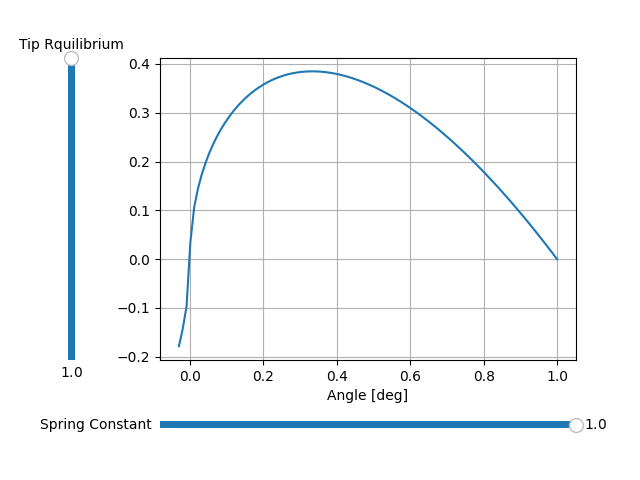

In [8]:
init_k = 1
init_H = 1

p_delta = np.linspace(-0.03,1,100)

fig, ax = plt.subplots()
ax.grid(1)
line, = ax.plot(p_delta, u(p_delta, init_H, init_k,simple_mult))
ax.set_xlabel('Angle [deg]')
fig.subplots_adjust(left = 0.25, bottom = 0.25)

axH = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
H_slider = Slider(
    ax=axH,
    label = "Tip Rquilibrium",
    valmin = 0.1,
    valmax = 1,
    valinit = init_H,
    orientation = "vertical"
)
axK = fig.add_axes([0.25, 0.1, 0.65, 0.03])
K_slider = Slider(
    ax=axK,
    label = "Spring Constant",
    valmin = 0.1,
    valmax = 1,
    valinit = init_k
)

def update(val):
    line.set_ydata(u(p_delta, H_slider.val, K_slider.val,simple_mult))
    fig.canvas.draw_idle()
    
H_slider.on_changed(update)
K_slider.on_changed(update)

# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')

plt.grid(1)
# def reset(event):
#     H_slider.reset()
#     K_slider.reset()
# button.on_clicked(reset)

plt.show()


Now as we can see here, both variables affect the amplitude and zero crossing point of the effect showing that on a clarinet, the stiffness of the reed (spring constant) and the reed tip equilibrium, both affect the maximum flow. Mathematicaly, we can see this when taking the derivative of the flow equation and finding the zero point of the equation.

In this case, we will assume that the pressure p is positive.

\begin{align}
    \frac{du}{dp\Delta } &= \frac{d}{dp\Delta }\left[\sqrt{p\Delta } \left(H - \frac{p\Delta }{k}\right) \right] \\
    u^{'}&= \frac{p\Delta ^{-\frac{1}{2}}}{2}\left( H-\frac{3}{k}p\Delta \right)
\end{align}

When $u^{'} = 0$, it marks the critical point in which the flow value goes from increasing to decreasing in value, in other words the maximum value of the curve:
\begin{align}
    0 &= \frac{p\Delta ^{-\frac{1}{2}}}{2}\left( H-\frac{3}{k}p\Delta \right)\\
    0 &= \left( H-\frac{3}{k}p\Delta \right)\\
    H &= \frac{3}{k}p\Delta\\
    p\Delta &= \frac{Hk}{3} 
\end{align}
    
Inputing this value for the pressure difference back into the curve we get:

\begin{align}
    u &= \sqrt{p\Delta } \left(H - \frac{p\Delta }{k}\right)  \\
    &= \sqrt{\frac{Hk}{3} } \left(H - \frac{H}{3}\right)\\
    &= \sqrt{\frac{Hk}{3}} \left(H - \frac{H}{3}\right)\\
    &= \sqrt{\frac{H^3k}{3}} \left(1 - \frac{1}{3}\right)\\
    &= \sqrt{\frac{H^3k}{3}} \frac{2}{3}\\
    &= \sqrt{\frac{4H^3k}{27}}\\
\end{align}

As we only need to worry about the positive value of pressure, this reperesents the max value of the flow's curve.

If we were to insert this in to the flow equation:

$$u_n = \frac{\sqrt{p\Delta } \left(H - \frac{p\Delta }{k}\right)}{\sqrt{\frac{4H^3k}{27}}}$$

Not only does the equation get normalized but the Amplitude of the curve is decoupled from the zero flow crossing point as shown here.

In [9]:
def u_N(x,H,k):
    normlalization_var = np.sqrt(4* H**3 *k/27)
    arr = np.sqrt(np.abs(x))*(H-x/k)*np.sign(x)/normlalization_var
    return arr

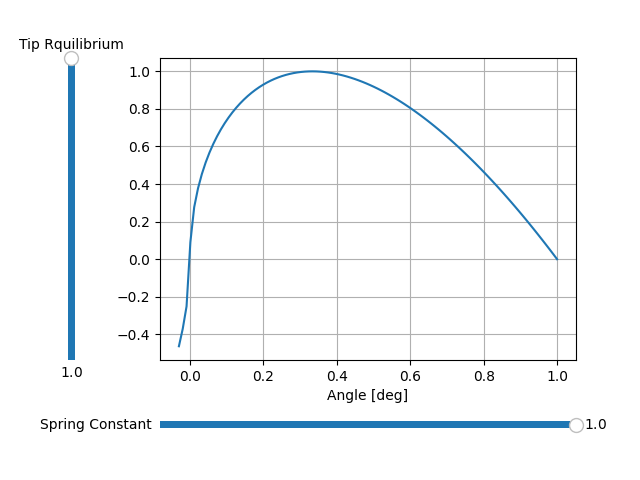

In [10]:
init_k = 1
init_H = 1

p_delta = np.linspace(-0.03,1,100)

fig, ax = plt.subplots()
ax.grid(1)
line, = ax.plot(p_delta, u_N(p_delta, init_H, init_k))
ax.set_xlabel('Angle [deg]')
fig.subplots_adjust(left = 0.25, bottom = 0.25)

axH = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
H_slider = Slider(
    ax=axH,
    label = "Tip Rquilibrium",
    valmin = 0.1,
    valmax = 1,
    valinit = init_H,
    orientation = "vertical"
)
axK = fig.add_axes([0.25, 0.1, 0.65, 0.03])
K_slider = Slider(
    ax=axK,
    label = "Spring Constant",
    valmin = 0.1,
    valmax = 1,
    valinit = init_k
)

def update(val):
    line.set_ydata(u_N(p_delta, H_slider.val, K_slider.val))
    fig.canvas.draw_idle()
    
H_slider.on_changed(update)
K_slider.on_changed(update)

# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')

plt.grid(1)
# def reset(event):
#     H_slider.reset()
#     K_slider.reset()
# button.on_clicked(reset)

plt.show()


Now we can add in a variable 'A' that can control the amplitude of the flow independently.

In [11]:
def u_N_Amp(x,k,A,H=1):
    normlalization_var = np.sqrt(4*k/27)
    arr = A * np.sqrt(np.abs(x))*(H-x/k)*np.sign(x)/normlalization_var
    return arr

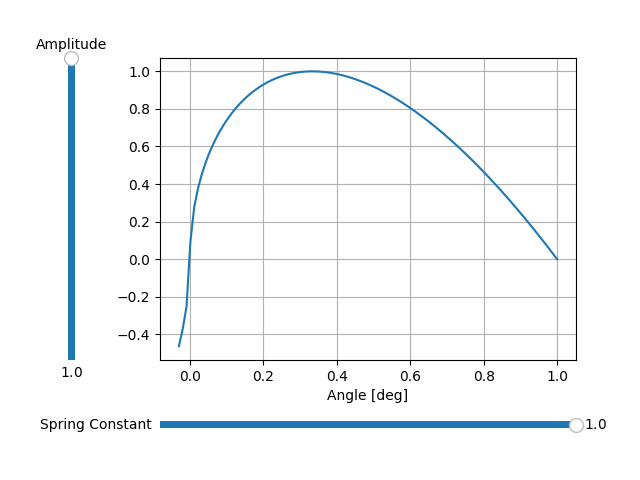

In [12]:
init_k = 1
init_H = 1
init_A = 1

p_delta = np.linspace(-0.03,1,100)

fig, ax = plt.subplots()
ax.grid(1)
line, = ax.plot(p_delta, u_N_Amp(p_delta, init_k, init_A))
ax.set_xlabel('Angle [deg]')
fig.subplots_adjust(left = 0.25, bottom = 0.25)

axA = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
A_slider = Slider(
    ax=axA,
    label = "Amplitude",
    valmin = 0.1,
    valmax = 1,
    valinit = init_A,
    orientation = "vertical"
)
axK = fig.add_axes([0.25, 0.1, 0.65, 0.03])
K_slider = Slider(
    ax=axK,
    label = "Spring Constant",
    valmin = 0.1,
    valmax = 1,
    valinit = init_k
)

def update(val):
    line.set_ydata(u_N_Amp(p_delta, K_slider.val, A_slider.val))
    fig.canvas.draw_idle()
    
K_slider.on_changed(update)
A_slider.on_changed(update)

# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')
# def reset(event):
#     H_slider.reset()
#     K_slider.reset()
# button.on_clicked(reset)

plt.show()


The Question here is why would this be a useful design parameter,